# Checking to see if younger soccer players are more expensive to buy.
This is aiming to see wether age has any correlation with price in the transfer market across all leagues 

### All the cleaning was done in clean.ipynb

First, the imports:

In [7]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
%%R

require('tidyverse')

## Note for the editor

### Most changes/removals are because we are trying to calculate trends of how parent clubs have assesed the value of their young players, and what buying clubs think is worth paying for. 

1. Loan trasfers are not included because we are simply looking at permananet transfers, by taking a loan, the amount of risk taken by a club is not as significant.

2. Transfers within the club were removed. Transfermarkt also adds players who have been promoted from the academy to the first team as a transfer, the registration change is not enough as a transfer. 

In [11]:
df = pd.read_csv('data.csv')
len(df)
#arrange according to ascending age
df = df.sort_values(by=['fee_cleaned'])
df.head()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season,country
2105,Parma Calcio 1913,Abdou Diakhate,20.0,Central Midfield,Fiorentina Primavera,€1k,in,Winter,0.001,Serie A,2018,2018/2019,Italy
2199,SS Lazio,Luca Germoni,21.0,Left-Back,Virtus Entella,€1k,in,Summer,0.001,Serie A,2019,2019/2020,Italy
2530,UC Sampdoria,Lorenzo Campaner,18.0,Right-Back,Sangiovannese 1927,€7k,in,Summer,0.007,Serie A,2021,2021/2022,Italy
1664,US Sassuolo,Pietro Cianci,20.0,Centre-Forward,Fidelis Andria,€20k,in,Summer,0.020,Serie A,2016,2016/2017,Italy
1864,SPAL 2013,Lorenzo Polvani,22.0,Centre-Back,US Città di Pontedera,€25k,in,Summer,0.025,Serie A,2017,2017/2018,Italy


# I want to test if younger players are more expensive than older players

## Null Hypothesis: The fee of a player is not different for young players and old players (H0: Uy = Uo)
## Alternative Hypothesis: the fee of young players is higher than the fee of older players (H1: Uy > Uo)

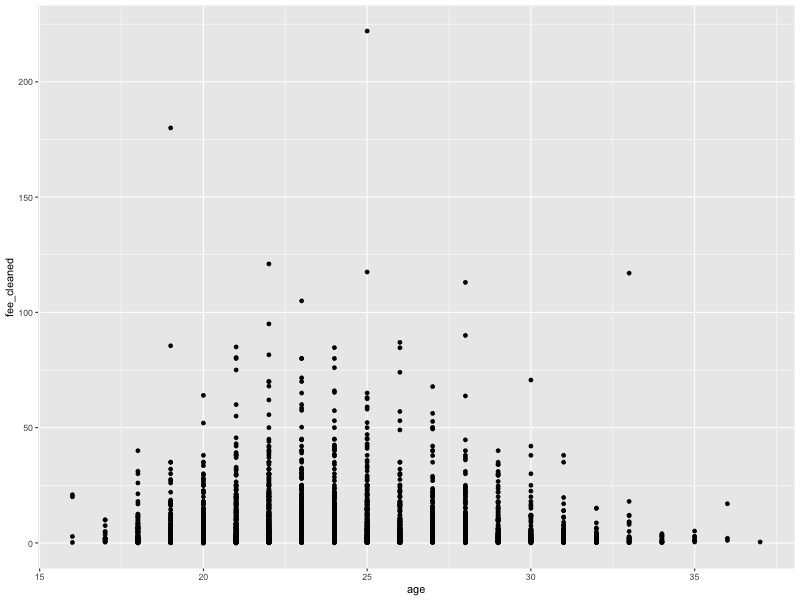

In [13]:
%%R -i df -w 800 -h 600
#This is just plotting all the data
ggplot(df, aes(x=age, y=fee_cleaned)) +
    geom_point()

I thought I should draw a line. 

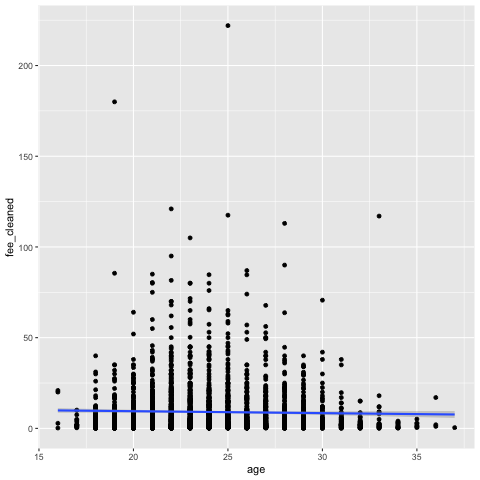

In [14]:
%%R

ggplot(df, aes(x=age, y=fee_cleaned)) +
    geom_point() + 
    geom_smooth(method='lm', formula= y~x)

The line was useless.

In [16]:
%%R

model <- lm(fee_cleaned ~ age, data=df)

summary(model)


Call:
lm(formula = fee_cleaned ~ age, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
 -9.694  -7.549  -5.075   2.045 213.064 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.59672    1.76931   6.554 6.63e-11 ***
age         -0.10642    0.07285  -1.461    0.144    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.01 on 2803 degrees of freedom
Multiple R-squared:  0.0007607,	Adjusted R-squared:  0.0004042 
F-statistic: 2.134 on 1 and 2803 DF,  p-value: 0.1442



### Analysis

I think that this model shows that players lose around 100K in value for every year they gain. The P values are also quite low. So there is something here. I may need to figure out filter out te data.

The line is not very regressive. I think this will not give me too much, so I should split the dataframe into two sets. 

In [17]:
#Make two new dataframes with players before their peak and after their peak
df_young = df[df['age'] < 26]
df_old = df[df['age'] >= 26]

### 26 is the age at which players peak, so i'm expecting values to spike just before that.

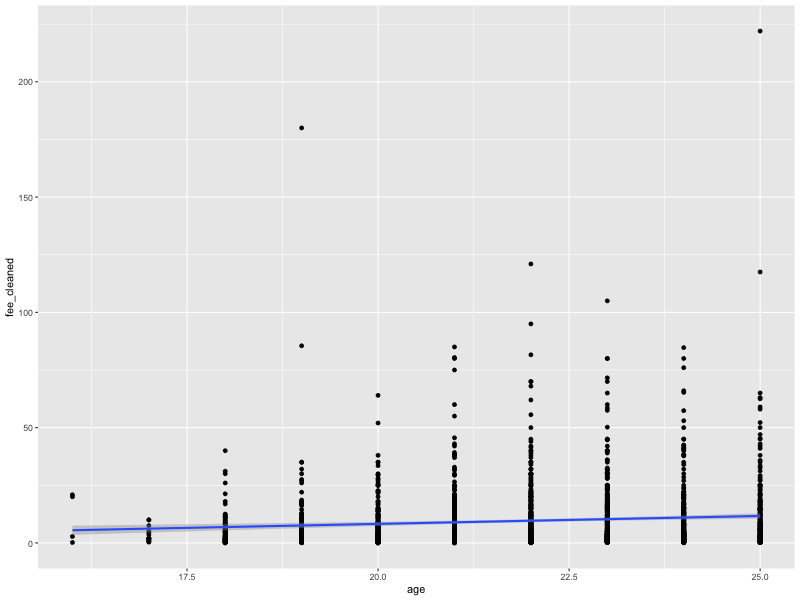

In [18]:
%%R -i df_young -w 800 -h 600

ggplot(df_young, aes(x=age, y=fee_cleaned)) +
    geom_point() + 
    geom_smooth(method='lm', formula= y~x)


In [19]:
%%R

model <- lm(fee_cleaned ~ age, data=df_young)

summary(model)


Call:
lm(formula = fee_cleaned ~ age, data = df_young)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.589  -7.815  -5.002   2.511 210.311 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -5.4962     3.5499  -1.548    0.122    
age           0.6874     0.1606   4.280 1.96e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.66 on 1914 degrees of freedom
Multiple R-squared:  0.009478,	Adjusted R-squared:  0.008961 
F-statistic: 18.32 on 1 and 1914 DF,  p-value: 1.964e-05



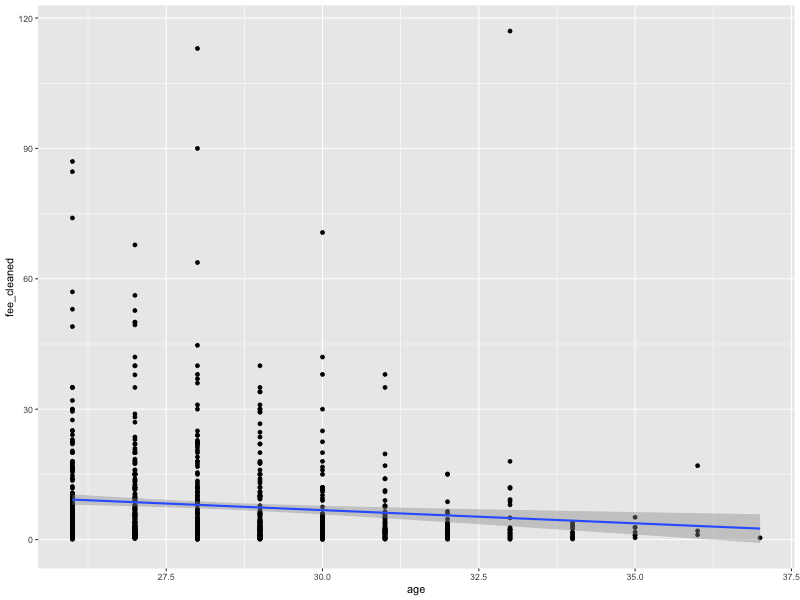

In [20]:
%%R -i df_old -w 800 -h 600

ggplot(df_old, aes(x=age, y=fee_cleaned)) +
    geom_point()+ 
    geom_smooth(method='lm', formula= y~x)

## Older players fade into irrelavence

In [21]:
%%R

model <- lm(fee_cleaned ~ age, data=df_old)

summary(model)


Call:
lm(formula = fee_cleaned ~ age, data = df_old)

Residuals:
    Min      1Q  Median      3Q     Max 
 -9.106  -6.381  -3.988   1.299 112.045 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  24.9710     5.3605   4.658 3.68e-06 ***
age          -0.6065     0.1885  -3.217  0.00134 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.16 on 887 degrees of freedom
Multiple R-squared:  0.01153,	Adjusted R-squared:  0.01042 
F-statistic: 10.35 on 1 and 887 DF,  p-value: 0.001342



## Hmm, interesting

### I can see that value drops for older players and it increases for the younger ones. I think I should make a t test with the two dataframes and see what happens. 

### BUT I would also need to join or add other datasets. This dataset seems ripe for multiple regressions. 

The thing with the value of football players is that it tends to vary based on position, club, previous performance (hmm this is numeric and ideal for multi-regression analysis). I should check based on individual clubs. Richer clubs buy players a couple of years away from their peak. Feeder clubs like Borussia Dortmund sign players who are younger. 

Can I make a model for each club?

## For fun, let's do anova test

In [22]:
%%R -i df_young

res <- t.test(fee_cleaned~age, data=df_young)

R[write to console]: Error in t.test.formula(fee_cleaned ~ age, data = df_young) : 
  grouping factor must have exactly 2 levels




Error in t.test.formula(fee_cleaned ~ age, data = df_young) : 
  grouping factor must have exactly 2 levels


RInterpreterError: Failed to parse and evaluate line '\nres <- t.test(fee_cleaned~age, data=df_young)\n'.
R error message: 'Error in t.test.formula(fee_cleaned ~ age, data = df_young) : \n  grouping factor must have exactly 2 levels'